In [162]:
# Cellule 1 : Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import os

In [174]:
# Cellule 2 : Chargement des données
# Définir le chemin vers votre dossier de données
data_dir = "data/"
categories = ['bon', 'malade']

images = []
labels = []

for idx, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = tf.keras.preprocessing.image.load_img(
            img_path, target_size=(224, 224)
        )
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        labels.append(idx)

X = np.array(images)
y = np.array(labels)

print(f"Nombre total d'images : {len(X)}")
print(f"Shape des images : {X.shape}")
print(f"Shape des labels : {y.shape}")

Nombre total d'images : 138
Shape des images : (138, 224, 224, 3)
Shape des labels : (138,)


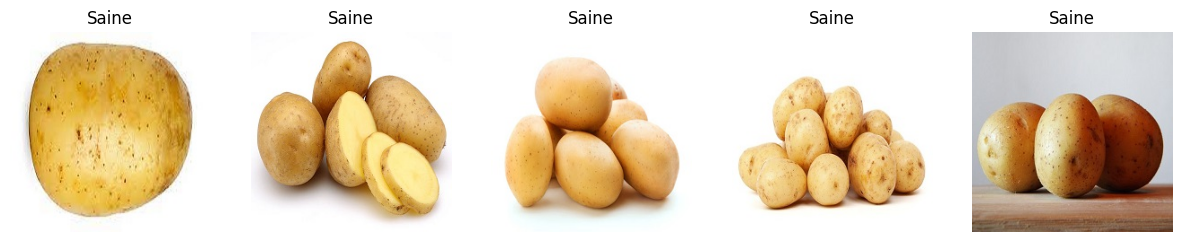

In [176]:
# Cellule 3 : Affichage de quelques images
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[i].astype('uint8'))
    plt.title('Saine' if y[i] == 0 else 'Malade')
    plt.axis('off')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9916\2778103793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


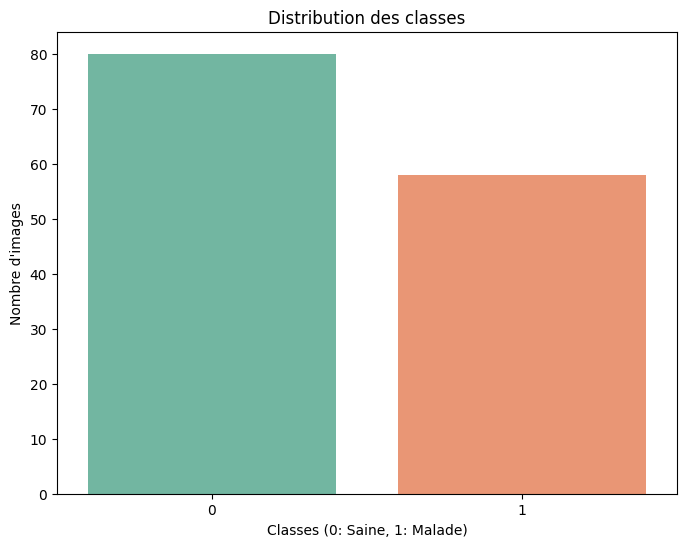

In [172]:
# Cellule 4 : Distribution des classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="Set2")
plt.title('Distribution des classes')
plt.xlabel('Classes (0: Saine, 1: Malade)')
plt.ylabel("Nombre d'images")
plt.show()

In [86]:
# Cellule 5 : Prétraitement des données
# Normalisation
X = X.astype('float32') / 255.0

# Encodage one-hot des labels
y = to_categorical(y)

# Division train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape des données d'entraînement:", X_train.shape)
print("Shape des données de test:", X_test.shape)

Shape des données d'entraînement: (110, 224, 224, 3)
Shape des données de test: (28, 224, 224, 3)


In [138]:
# Cellule 6 : Création du modèle CNN
model = Sequential([
    # Première couche de convolution et de pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'),
    MaxPooling2D(2, 2),
    
    # Deuxième couche de convolution et de pooling
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    
    # Troisième couche de convolution et de pooling
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    
    # Aplatissement de l'image sur un vecteur colonne
    Flatten(),
    
    # Couches densement connectées
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    # Faire la prédiction de la classe d'appartenance 
    Dense(2, activation='softmax')  # 2 classes: saine et malade
])

# Affichage de l'architecture du modèle
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,605,826 (196.86 MB)

 Trainable params: 51,605,826 (196.86 MB)

 Non-trainable params: 0 (0.00 B)

In [140]:
# Cellule 7 : Configuration de l'augmentation des données
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [142]:
# Cellule 8 : Compilation et entraînement du modèle
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 813ms/step - accuracy: 0.5302 - loss: 1.3042 - val_accuracy: 0.6429 - val_loss: 0.6157
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 760ms/step - accuracy: 0.6257 - loss: 0.6757 - val_accuracy: 0.9286 - val_loss: 0.5478
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 742ms/step - accuracy: 0.6865 - loss: 0.5989 - val_accuracy: 0.8214 - val_loss: 0.4131
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 709ms/step - accuracy: 0.7950 - loss: 0.5172 - val_accuracy: 0.9286 - val_loss: 0.2821
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 861ms/step - accuracy: 0.8739 - loss: 0.3627 - val_accuracy: 0.9286 - val_loss: 0.1897
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 851ms/step - accuracy: 0.8470 - loss: 0.3741 - val_accuracy: 0.8929 - val_loss: 0.1755
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 959ms/step - accuracy: 0.8246 - loss: 0.3367 - val_accuracy: 0.9286 - val_loss: 0.3154
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 831ms/step - accuracy: 0.7960 - loss: 0.5569 - val_accuracy: 0.9643 - val_loss:

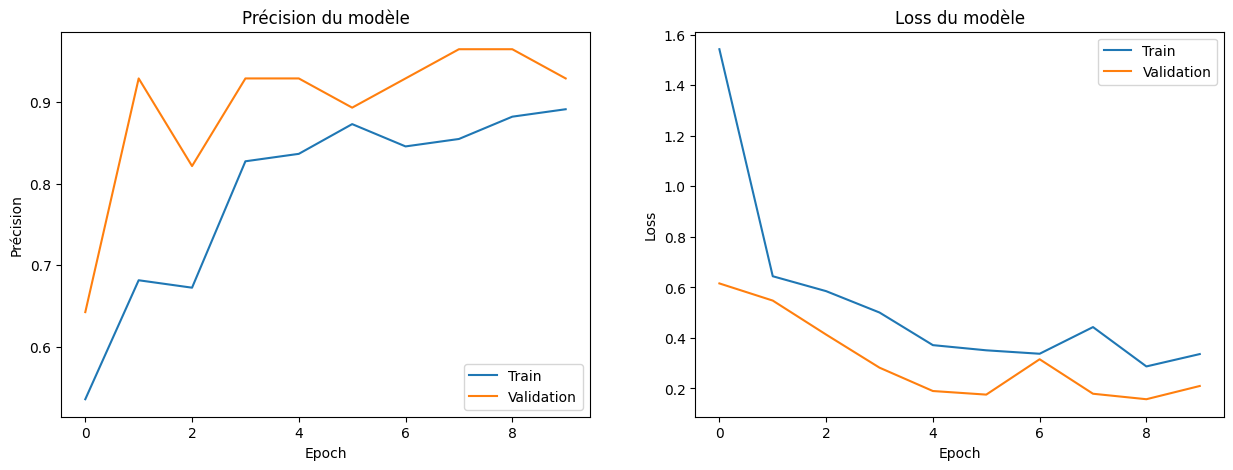

In [144]:
# Cellule 9 : Visualisation des courbes d'apprentissage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Courbe d'accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Précision du modèle')
ax1.set_ylabel('Précision')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'])

# Courbe de loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss du modèle')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'])

plt.show()

In [146]:
# Cellule 10 : Évaluation sur le jeu de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Précision sur le jeu de test: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9643 - loss: 0.1572
Précision sur le jeu de test: 0.9643


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


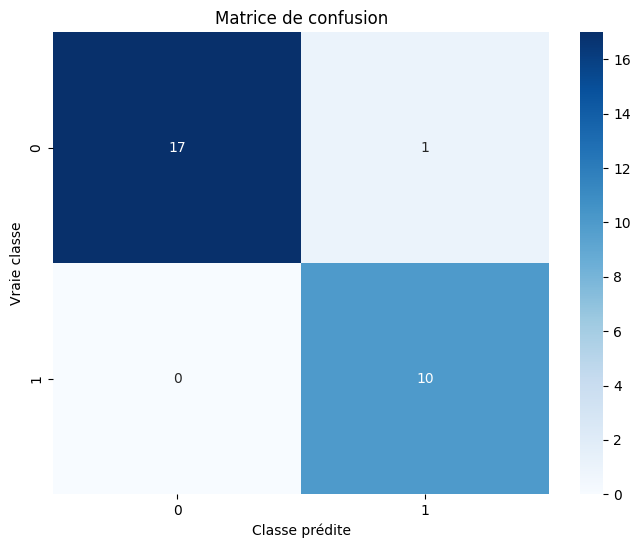

In [148]:
# Cellule 11 : Matrice de confusion
y_pred = model.predict(X_test)
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


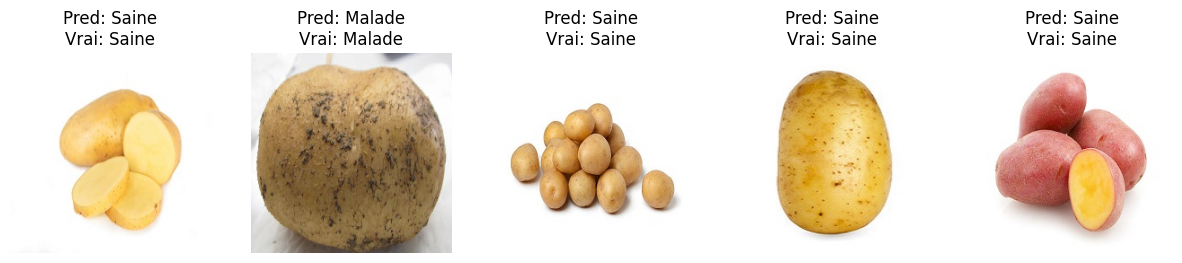

In [156]:
# Cellule 12 : Prédictions sur quelques images de test
num_images = 5
plt.figure(figsize=(15, 3))
for i in range(num_images):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[idx])
    pred_class = np.argmax(model.predict(X_test[idx:idx+1]))
    true_class = np.argmax(y_test[idx])
    plt.title(f'Pred: {"Saine" if pred_class==0 else "Malade"}\nVrai: {"Saine" if true_class==0 else "Malade"}')
    plt.axis('off')
plt.show()